# Part II - (Prosper Loan Data Exploration)
## by Zao Richardson Ansah

## Investigation Overview

My goal for this project is to explore a dataset containing loan information of approximately 113,937 loans. The dataset is the Prosper loan Dataset, provided by Udacity. I will center this presentation on the process of delving into the various interesting elements in order to establish the connection between the borrowers and the loans they obtained.


I'll start by introducing the relevant features, then discuss how they relate to one another, and last discuss how the influence of a different variable on this association. the features are Borrowers' employment status, their income range, stated monthly income and the loan original amount.

## Dataset Overview
The dataset being used for this project is the Prosper loan Dataset, provided by Udacity. There are 113,937 loans in the dataset with 81 features. 

For the analysis, a sub dataset was created having only 20 features of interest and the dataset features two main categories:
* Borrower information
* Loan performance information

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')


In [3]:
# Subset the dataframe by selecting features of interest
cols =['MemberKey','EmploymentStatus', 'Occupation','IncomeVerifiable','StatedMonthlyIncome', 'IncomeRange','BorrowerAPR','BorrowerRate','BorrowerState','DebtToIncomeRatio','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','LoanStatus','LoanKey','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter','Term', 'TotalProsperLoans']


#Lets loop through the list of all the columns and remove the unwanted columns one by one
for i in df.columns:
    if i not in cols:
        df.pop(i)

In [4]:
#lets convert all the columns labels to 
df.columns = map(str.lower, df.columns)

In [5]:
#renaming the columns labels in the dataset
df.columns.values[:] = ['term', 'loan_status', 'borrower_apr', 'borrower_rate', 'borrower_state',
       'occupation', 'employment_status', 'is_borrower_homeowner',
       'credit_score_range_lower', 'credit_score_range_upper', 'debt_to_income_ratio',
       'income_range', 'income_verifiable', 'stated_monthly_income', 'loan_key',
       'total_prosper_loans', 'loan_original_amount', 'loan_origination_date',
       'loan_origination_quarter', 'member_key']

In [6]:
# We know that for the total_prosper_loans variable, those who have not taken a loan before are represented as NULL. So its not 
#like its missing data. Its just incorrect representation of data. So lets change these NULL values to Zero(0)

df['total_prosper_loans'] = df['total_prosper_loans'].fillna(0)

In [7]:
#The length of the loan expressed in months should be converted into an object format to prevent any operation from being 
#performed on them

df['term'] = df['term'].astype('object');

In [8]:
#Dropping the duplicates from the data
df.drop_duplicates(inplace =True)

In [9]:
#Dropping all the rows with missing data
df.dropna(axis=0, inplace = True)

In [10]:
#Making a copy of the dataset to be used for the exploration Analysis
loan_data = df.copy()

In [11]:
loan_data.head()

,term,loan_status,borrower_apr,borrower_rate,borrower_state,occupation,employment_status,is_borrower_homeowner,credit_score_range_lower,credit_score_range_upper,debt_to_income_ratio,income_range,income_verifiable,stated_monthly_income,loan_key,total_prosper_loans,loan_original_amount,loan_origination_date,loan_origination_quarter,member_key
0,36,Completed,0.16516,0.1580,CO,Other,Self-employed,True,640.0,659.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,0.0,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA
1,36,Current,0.12016,0.0920,CO,Professional,Employed,False,680.0,699.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,0.0,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4
2,36,Completed,0.28269,0.2750,GA,Other,Not available,False,480.0,499.0,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,0.0,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612
3,36,Current,0.12528,0.0974,GA,Skilled Labor,Employed,True,800.0,819.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,0.0,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2
4,36,Current,0.24614,0.2085,MN,Executive,Employed,True,680.0,699.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C


In [12]:
#Creating a funtion to apply the title of the charts and the axes to reduce code reptition
def titles(xL,yL,title):
    plt.title(title)
    plt.xlabel(xL,size = 14)
    plt.ylabel(yL,size = 14)
color = sb.color_palette()[2];

In [13]:
#Creating a funtion to apply the title of the charts and the axes to reduce code reptition
def tr(xL,title):
    plt.title(title)
    plt.xlabel(xL,size = 13)
color = sb.color_palette()[2] 

## What is the distribution of the borrower's demography accross top 10 states?

The distribution of the borrower's demography accross top 10 states reveals that California (CA) is the state with the highest number of borrowers


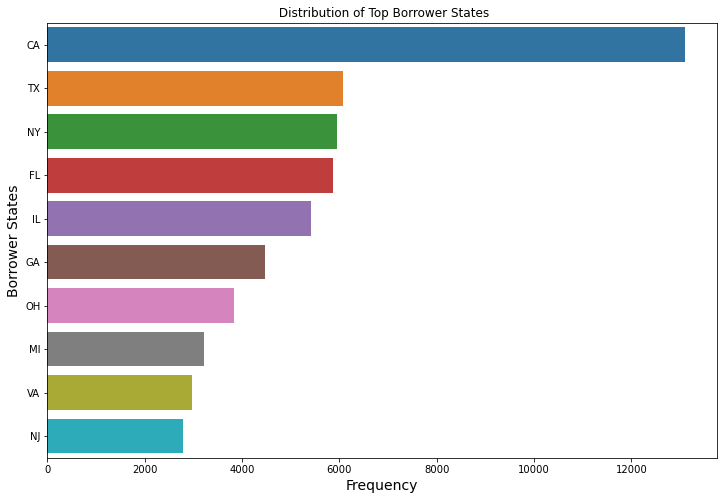

In [14]:
#looking at borrower's demography to see distribution across top 10 States 
plt.figure(figsize = [12, 8])


order = loan_data['borrower_state'].value_counts().iloc[:10].index
sb.countplot(data= loan_data, y= 'borrower_state', order = order)
titles("Frequency","Borrower States"," Distribution of Top Borrower States");

## What is the employment status of Borrowers at the time of listing?

 It can be seen from the chart that about 60000+ borrowers were employed at the time posting thier listings

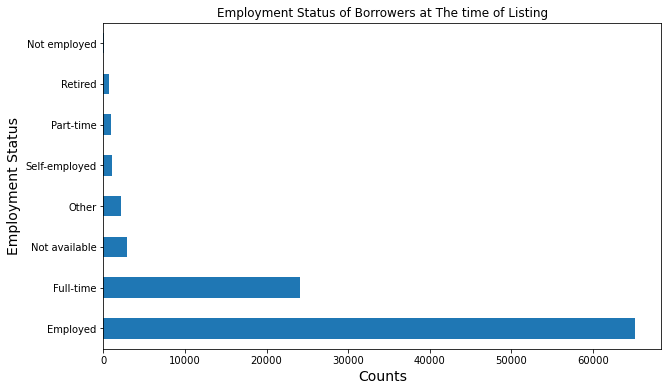

In [15]:
# Creating an horizontal barchart to show the distribution of the borrowers across the EmploymentStatus categories

plt.figure(figsize = [10, 6]) 

status = loan_data.employment_status.value_counts(ascending = False).head(10)

status.plot(kind ="barh")
titles("Counts","Employment Status","Employment Status of Borrowers at The time of Listing")

## What was the stated motnhly income of the borrowers ?

The stated monthly incomes of borrowers shows a right skewed distribution, with most montly salaries within the 2,500 and 5,000 range

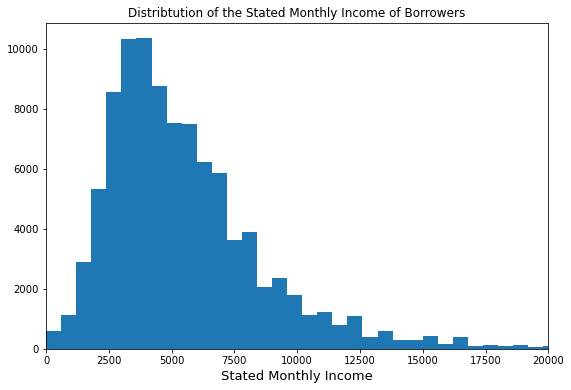

In [16]:
# creating an Histogram to show the distribution of the Borrower's Stated Monthly Income
plt.figure(figsize = [9, 6])
bin= np.arange(0, loan_data['stated_monthly_income'].max()+600, 600)
plt.hist(data= loan_data, x = 'stated_monthly_income', bins= bin)
tr("Stated Monthly Income","Distribtution of the Stated Monthly Income of Borrowers")
plt.xlim(0, 20000);

##  What is the correlation between 'loan_original_amount', 'stated_monthly_income' and 'borrower_rate'?

Slightly positive correlation between stated_monthly_income and loan_original_amount, where as a negative correlation between stated_monthly income and borrower_rate and loan_original_amount and borrower_rate


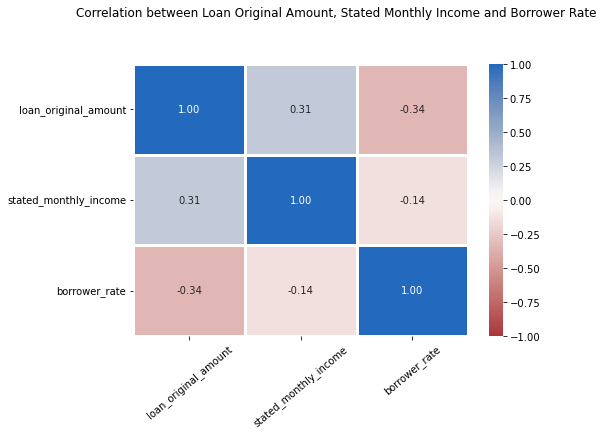

In [17]:

# numeric and categorical variables
numeric_vars = [ 'loan_original_amount', 'stated_monthly_income', 'borrower_rate']
categoric_vars = ['income_range', 'employment_status', 'term', 'year', 'is_borrower_homeowner']

# Visualize the correlations  with a heatmap
plt.figure(figsize= (7.5, 5))
sb.heatmap(data=loan_data[numeric_vars].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.suptitle("Correlation between Loan Original Amount, Stated Monthly Income and Borrower Rate", y = 1.04)
plt.xticks(rotation=40);


## What is the relationship between Employment status and the numerical variables: 'loan_original_amount', 'stated_monthly_income', 'borrower_rate'?

The employed, full-time employed, and self-employed borrowers have higher monthly incomes, obtain higher loan amounts, and enjoy lower Borrower APRs than the part-time, retired, and unemployed borrowers. Borrower rate is slightly lower in Self employed, full-time, unemployed and part -time borrowers.

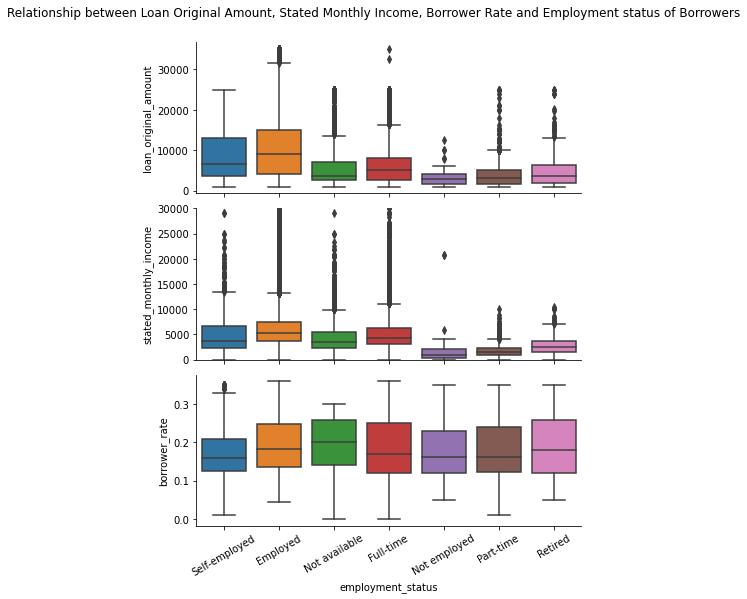

In [18]:
employment_filter = loan_data.query('employment_status != "Other"')

fig = sb.PairGrid(data=employment_filter, y_vars=numeric_vars, x_vars='employment_status', aspect=2.5)
fig.map(sb.boxplot)

# Setting the y axis of StatedMonthlyIncome to 0 - 30000
fig.axes[1][0].set_ylim(0, 30000)
plt.suptitle("Relationship between Loan Original Amount, Stated Monthly Income, Borrower Rate and Employment status of Borrowers", y = 1.04);
plt.xticks(rotation=30);

## What is relationship between borrowers loan original amount and their verifiable income status?

Looking at relationship between borrowers loan original amount and their verifiable income status, from the chart, Borrowers with verified income tend to have a higher average loan amount than borrowers without verified income. 

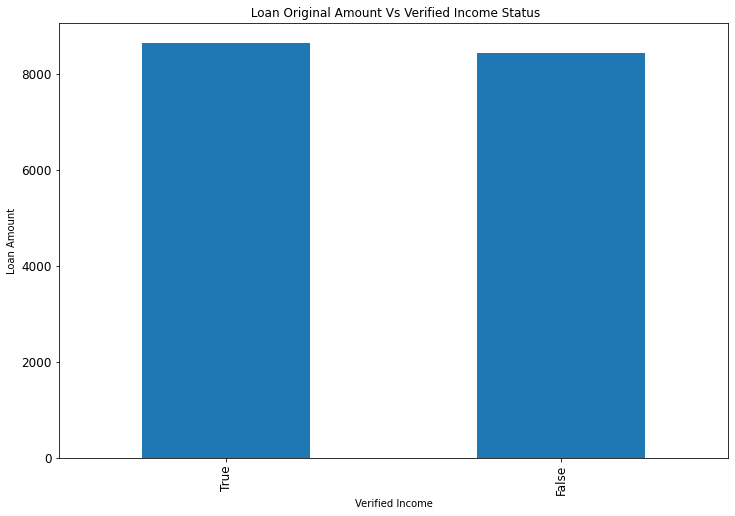

In [19]:
# looking at relationship between borrowers loan original amount and their verifiable income status 
a= loan_data.groupby('income_verifiable')['loan_original_amount'].mean().sort_values(ascending=False)
plt.figure(figsize = [12, 8])
default_color = sb.color_palette()[0]
a.plot(kind='bar',fontsize=12,color=default_color)
plt.xlabel('Verified Income')
plt.ylabel ('Loan Amount')
plt.title(' Loan Original Amount Vs Verified Income Status');

## Does a verified income have effect on the relationship between loan_original_amount and income_range ?

From the chart, it shows that people who earn ($)100,000+ and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers within most income ranges that have verified incomes tend to get higher loan amounts.

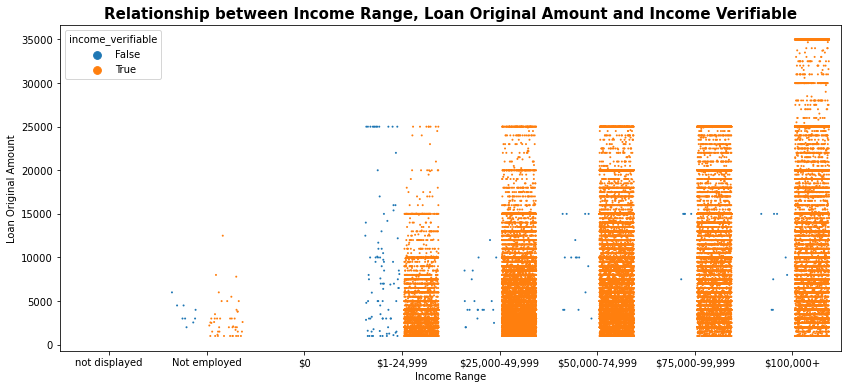

In [20]:
plt.figure(figsize = (14,6))
order = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']
sb.stripplot(data= loan_data, x= 'income_range', y ='loan_original_amount', hue = 'income_verifiable', 
           order = order, size = 2, jitter= 0.35, dodge = True)
plt.title('Relationship between Income Range, Loan Original Amount and Income Verifiable', fontsize= 15, fontweight = 'bold')
plt.xlabel('Income Range')
plt.ylabel('Loan Original Amount')
plt.show()

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt